# <center> Rain prediction </center>

## Recurrent Nural Net Approach

In [86]:
## importing basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#try:
#    !pip install tensorflow-gpu
#except:
#!pip install tensorflow
import tensorflow as tf

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)


# importing dataset

In [87]:

dataset = pd.read_csv('../input/Temp_and_rain.csv')

In [88]:
dataset.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


## checking missing data

## No missing value

In [89]:
dataset.isnull().sum()

tem      0
Month    0
Year     0
rain     0
dtype: int64

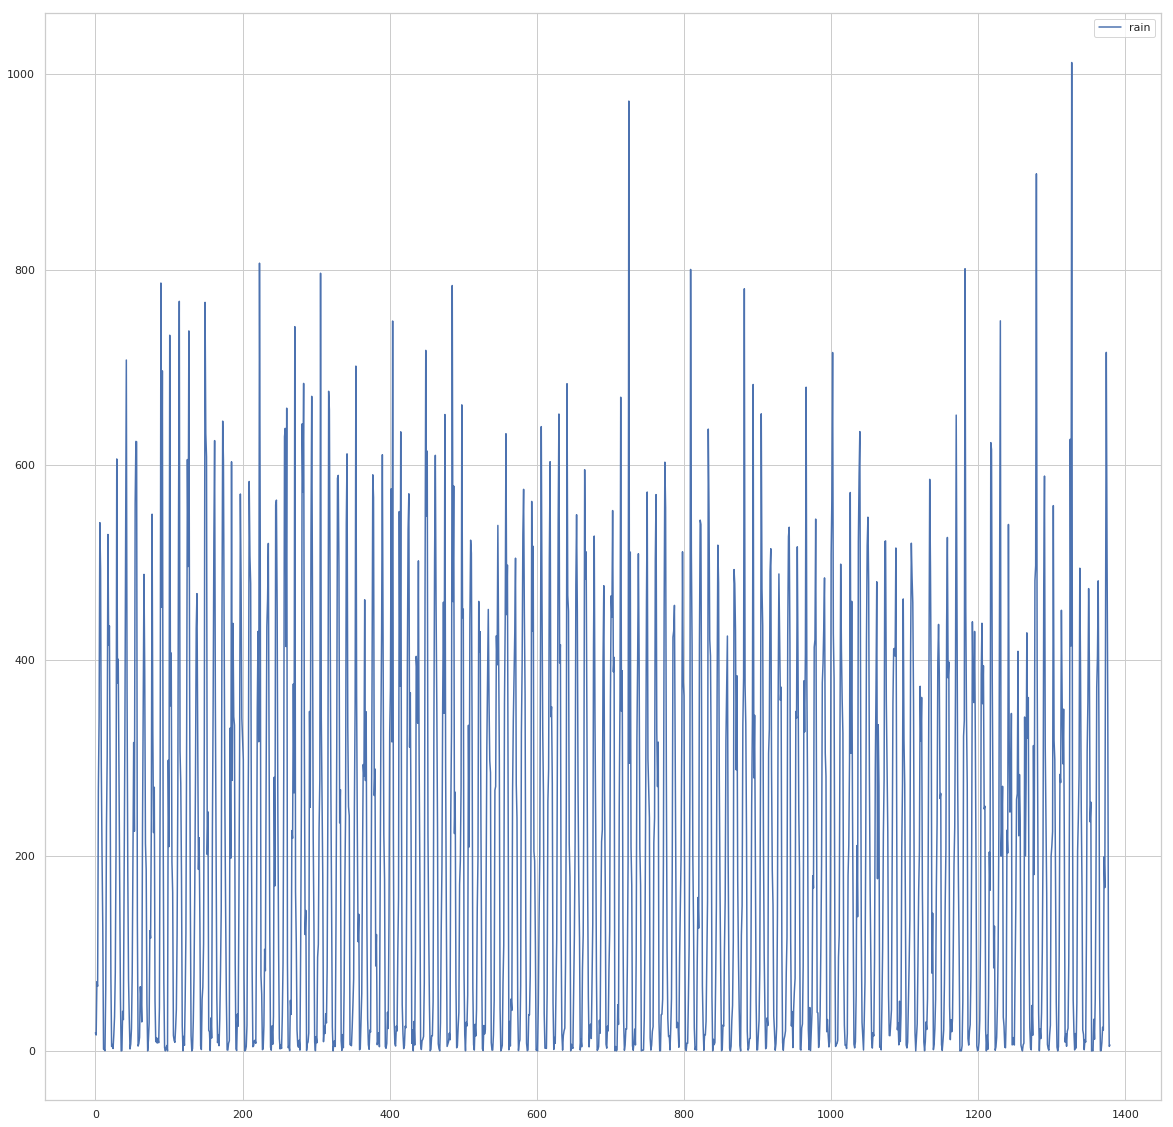

In [90]:
dataset[['rain']].plot()

## histogram of the rain 

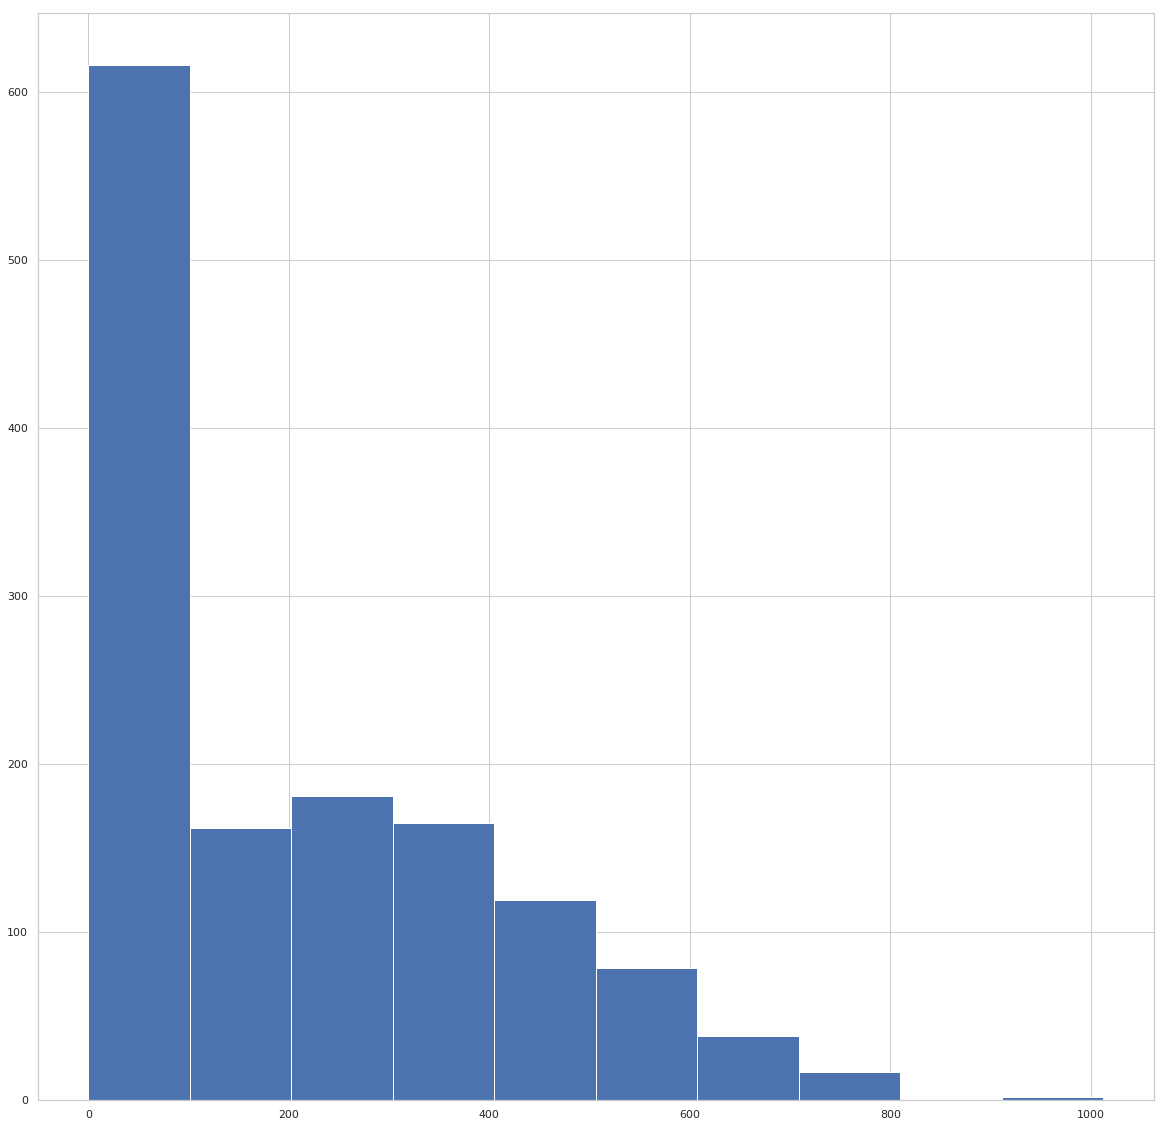

In [91]:
dataset.rain.hist()

## histogram of the temp

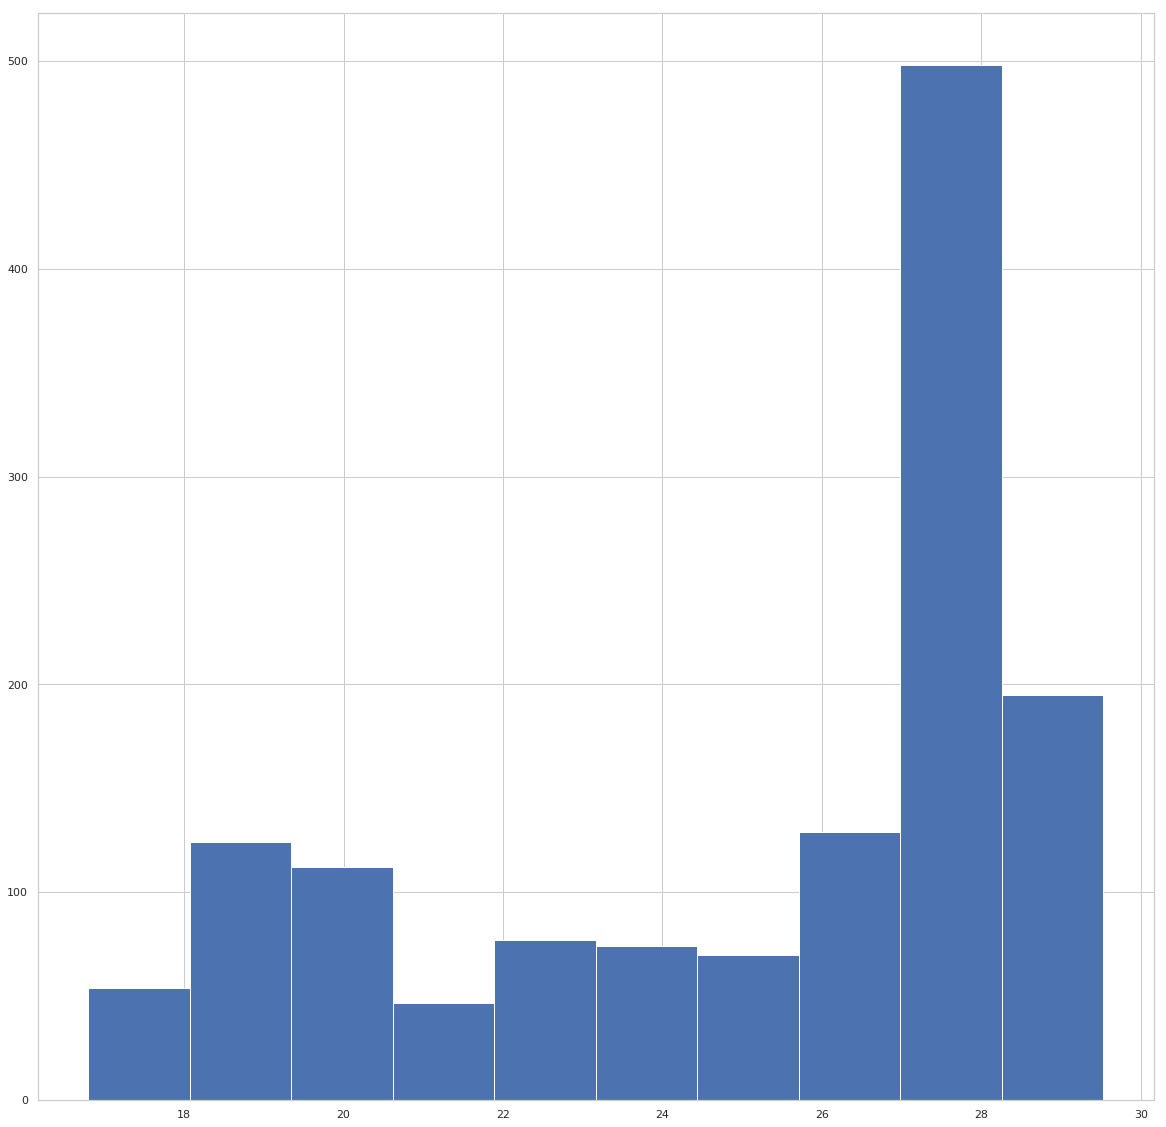

In [92]:
dataset.tem.hist()

## Rain in different year

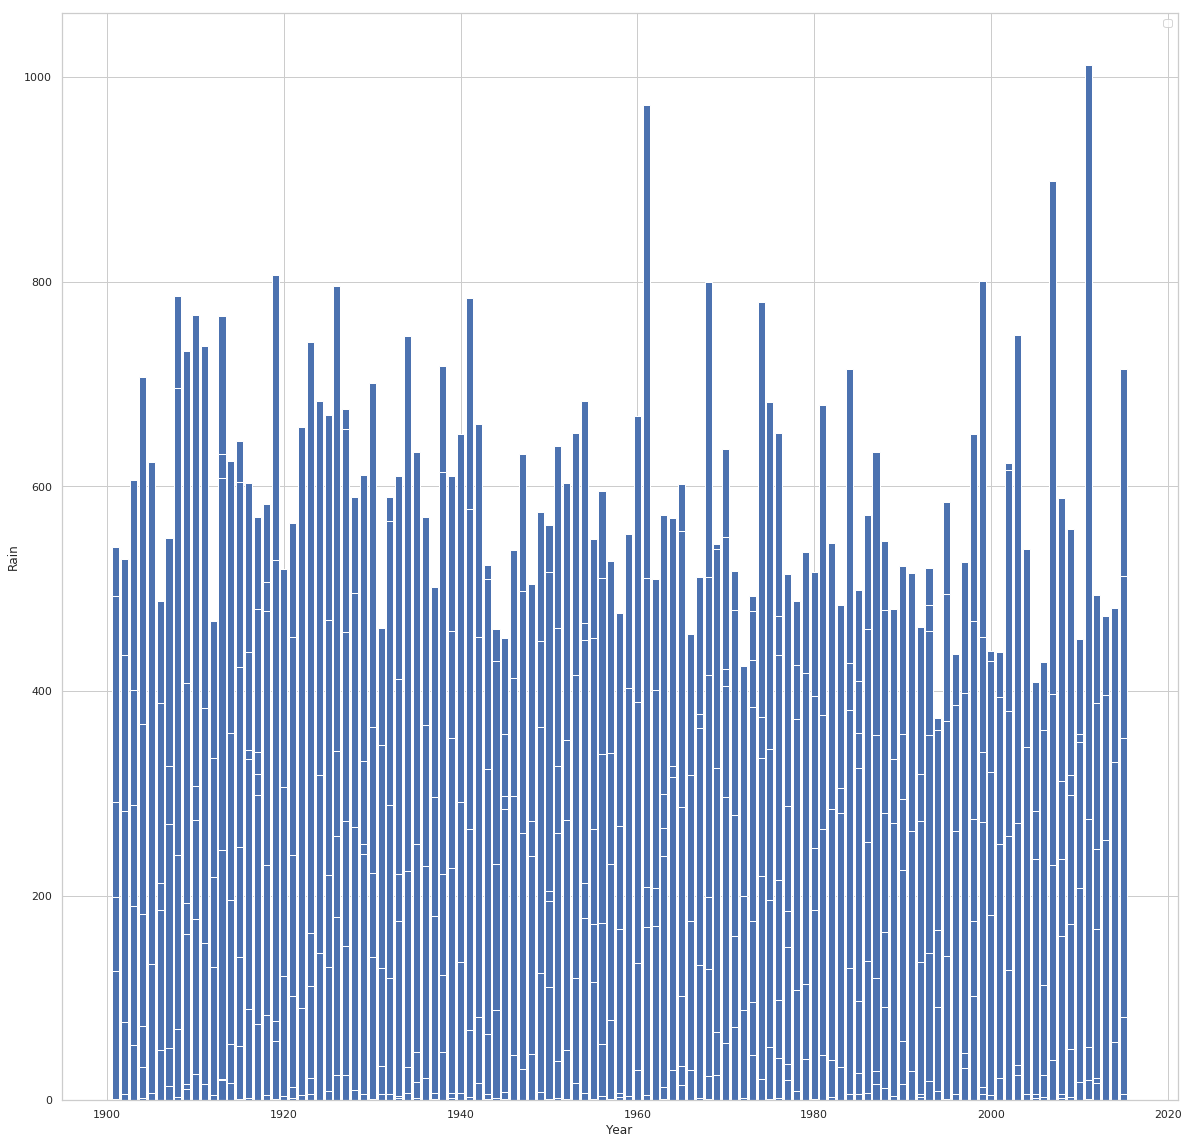

In [93]:
plt.bar(dataset['Year'],dataset['rain'])
plt.xlabel("Year")
plt.ylabel("Rain")
plt.legend()

## Temp to Rain plot

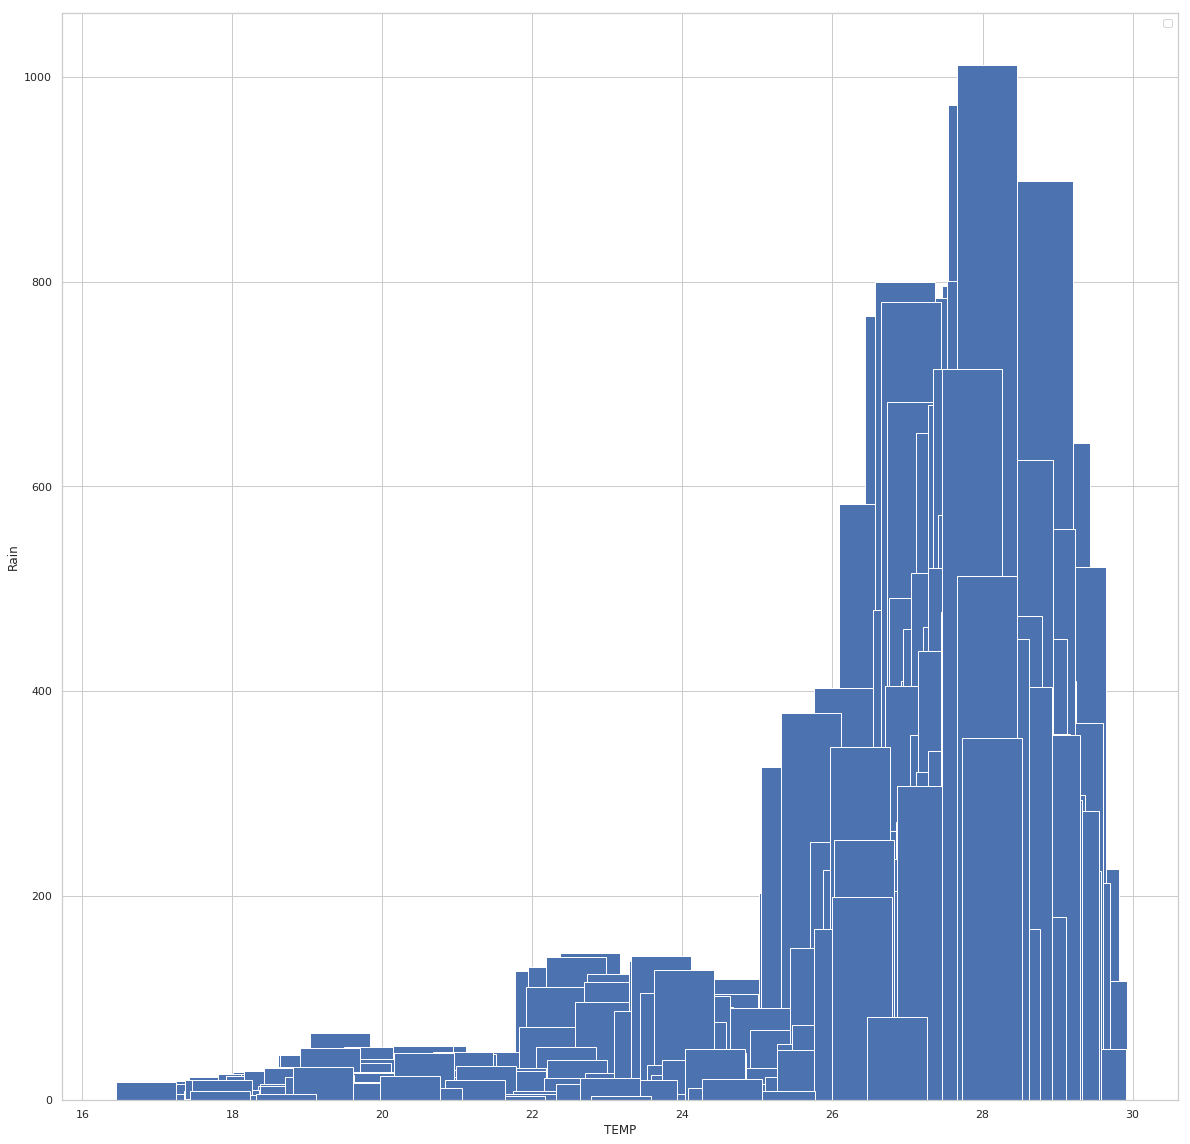

In [94]:
plt.bar(dataset['tem'],dataset['rain'])
plt.xlabel("TEMP")
plt.ylabel("Rain")
plt.legend()

In [95]:
import seaborn as sns

In [96]:
correlation = dataset.corr()

## Correlation matrix

In [97]:
correlation

,tem,Month,Year,rain
tem,1.000000,0.159809,0.051686,0.699846
Month,0.159809,1.000000,0.000000,0.135204
Year,0.051686,0.000000,1.000000,-0.027024
rain,0.699846,0.135204,-0.027024,1.000000


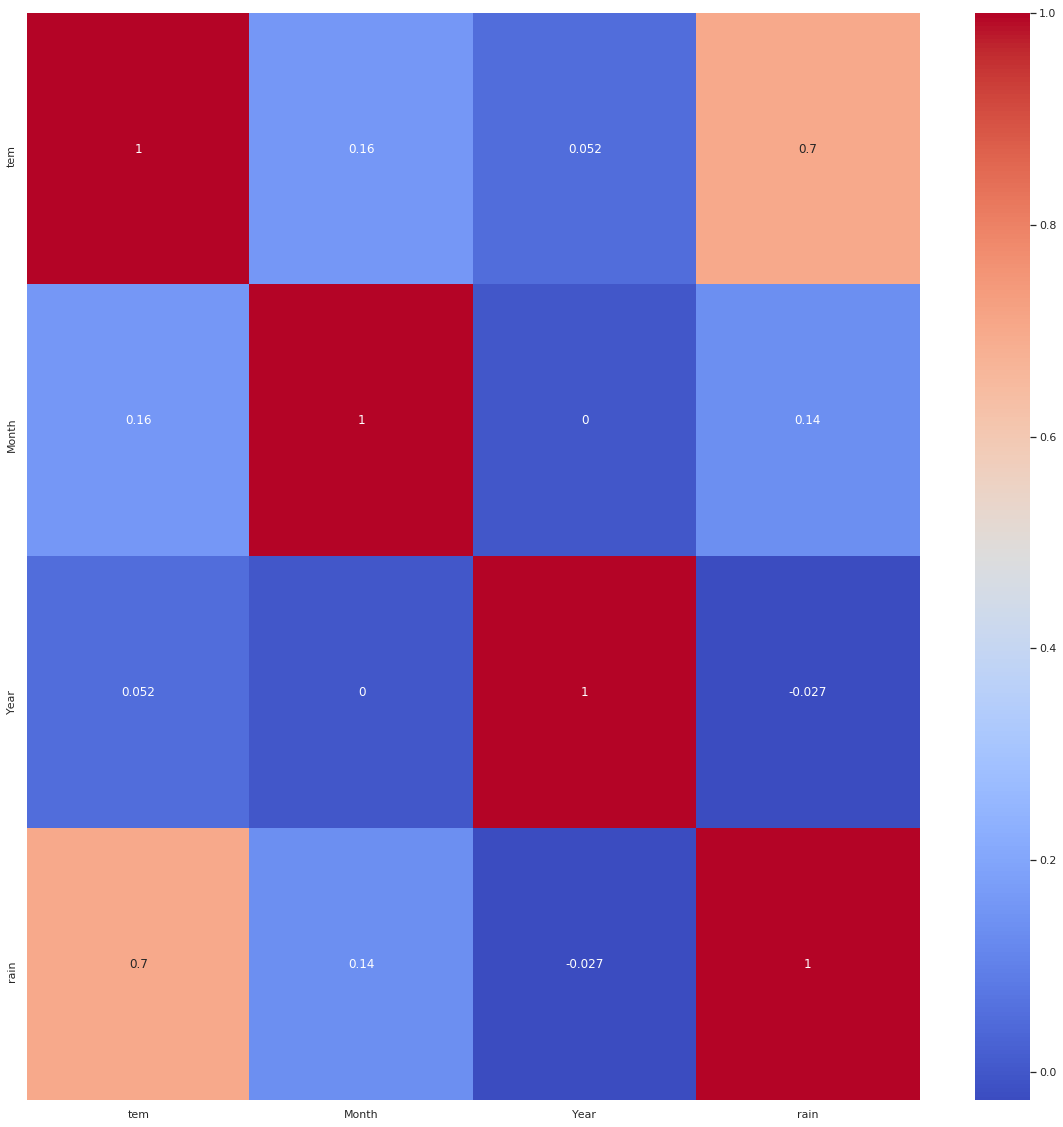

In [98]:
sns.heatmap(correlation,cmap='coolwarm',annot=True)

In [99]:
## setting the style first
sns.set(style="whitegrid",color_codes=True) ## change style

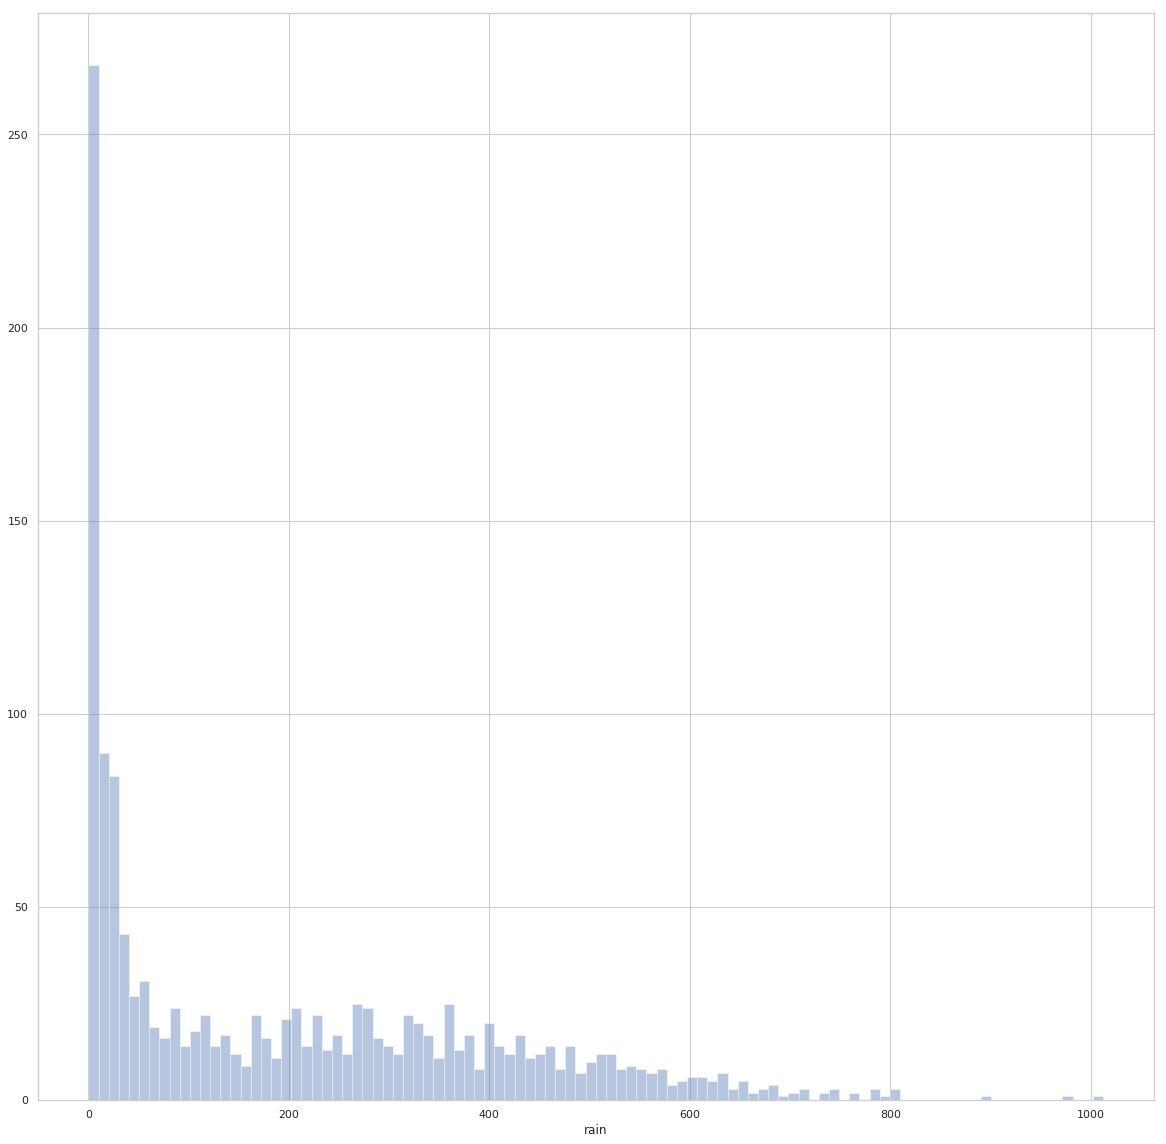

In [100]:
sns.distplot(dataset['rain'], kde=False, bins=100);

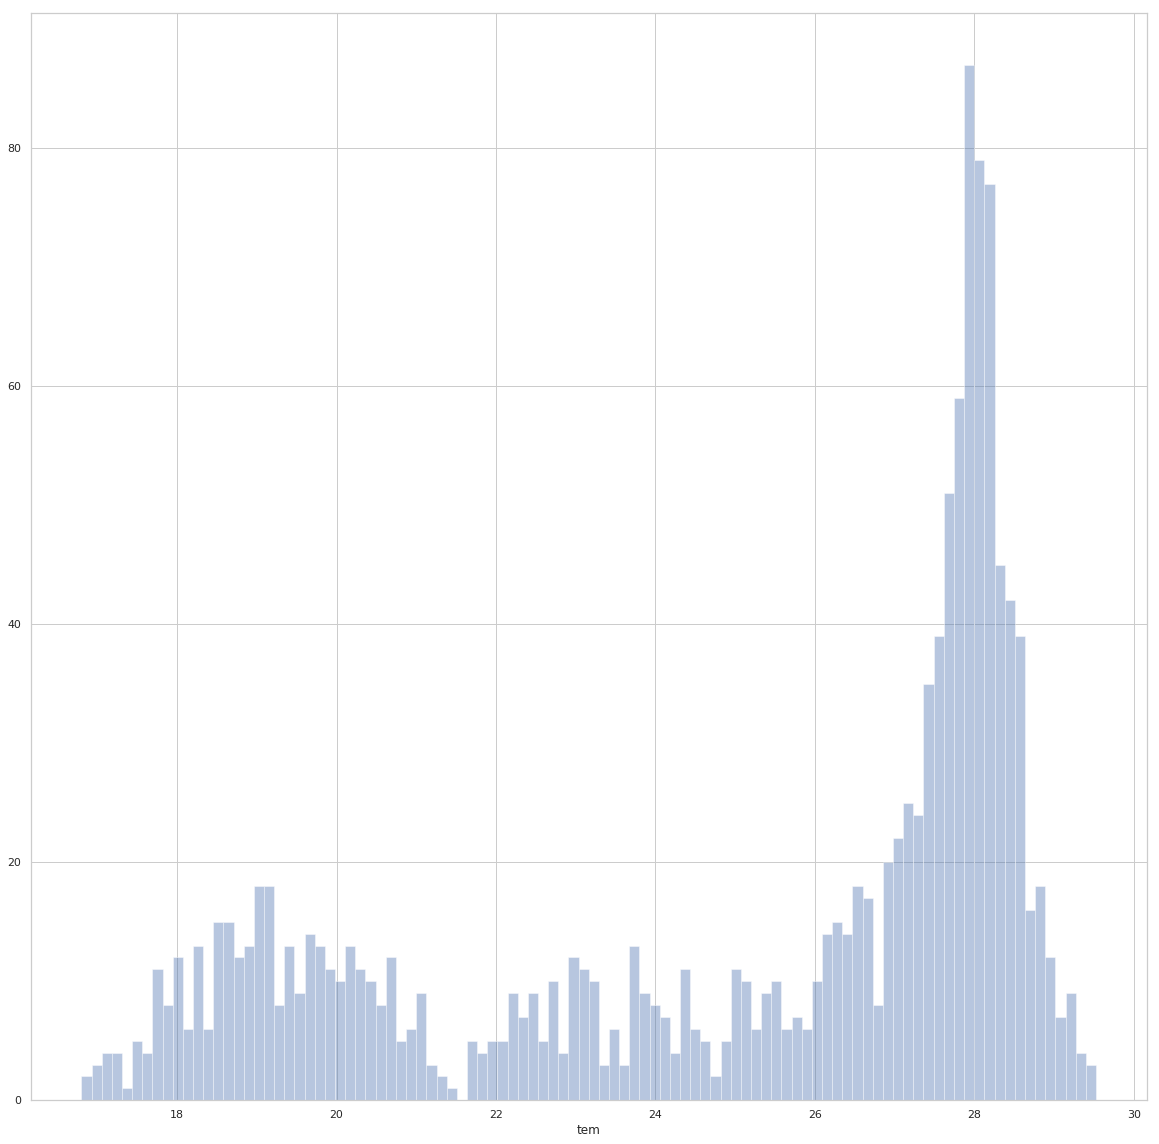

In [101]:
sns.distplot(dataset['tem'],kde=False, bins=100);


## relational scatter plot of differnt rain quantity in different Year

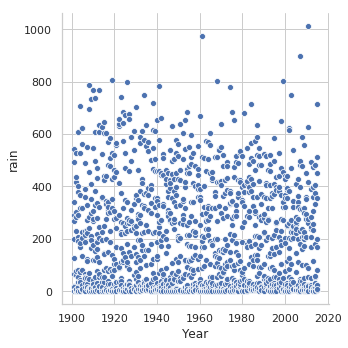

In [102]:
sns.relplot(x="Year", y="rain", data=dataset);

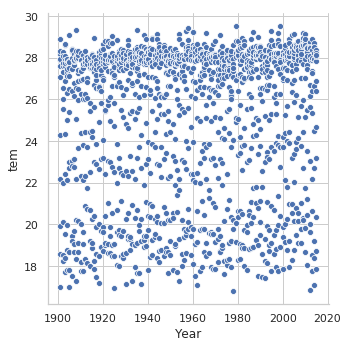

In [103]:
sns.relplot(x="Year", y="tem", data=dataset);

## relation betwen temp and rain in different year

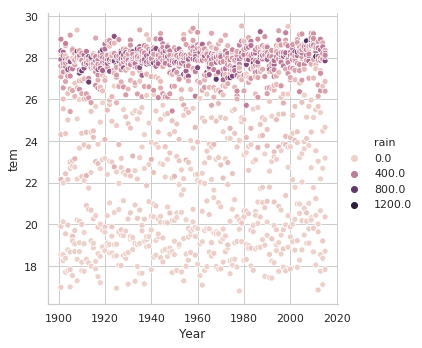

In [104]:
sns.relplot(x="Year", y="tem", hue="rain", data=dataset);

## box plot

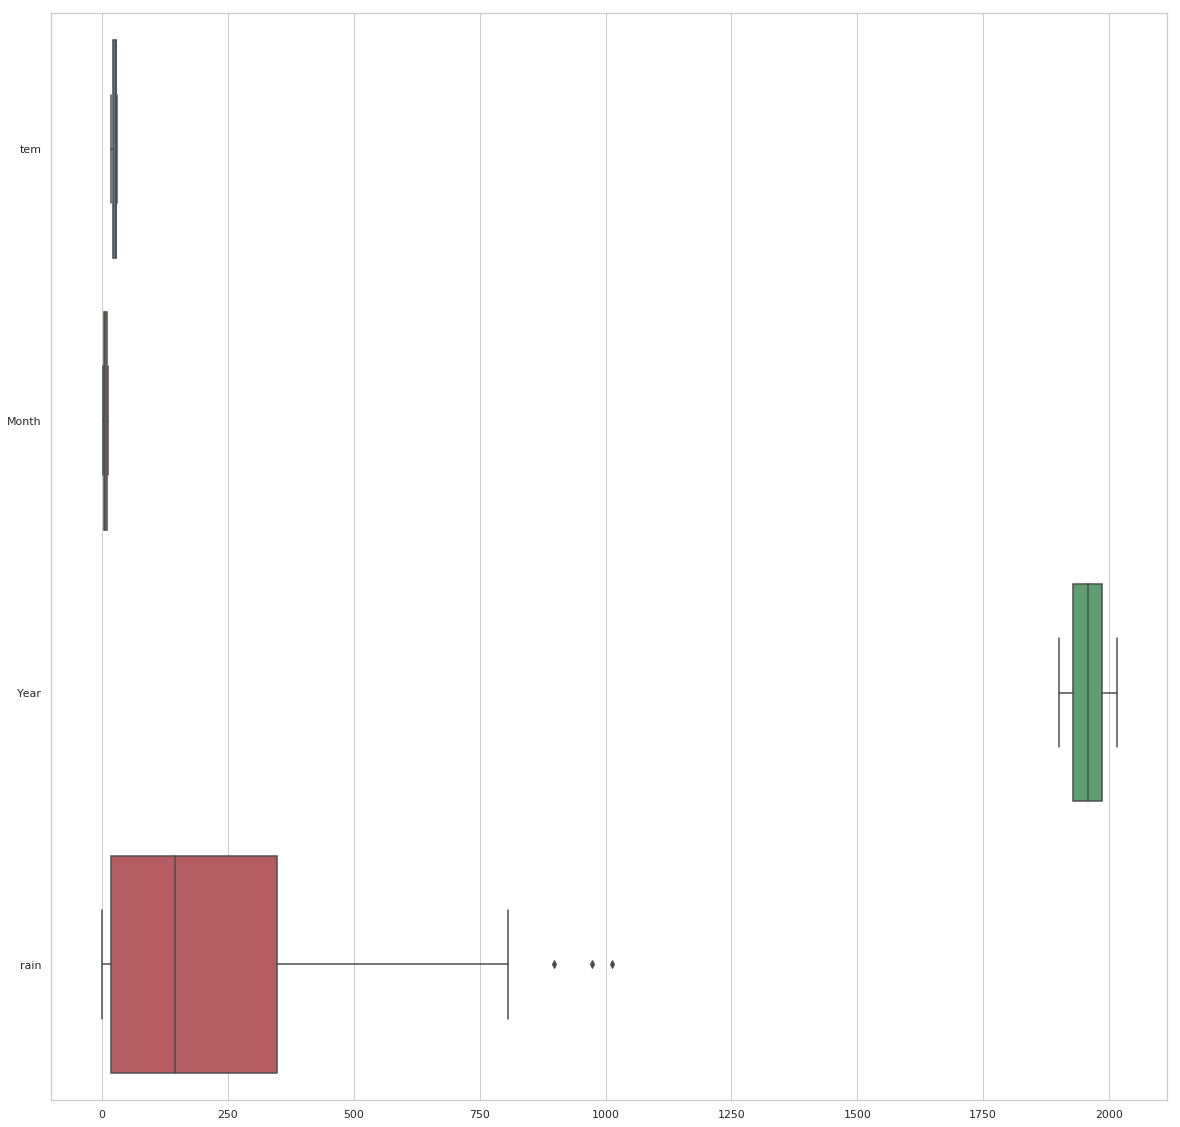

In [105]:
sns.boxplot(data=dataset,orient='h')

# model selection with preprocessing

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## splitting the feature matrix and target

In [107]:
dataset.head()
X = dataset.drop('rain',axis=1)
X = X.drop('tem',axis=1)
y = dataset[['rain','tem']]

In [108]:
X.head()

,Month,Year
0,1,1901
1,2,1901
2,3,1901
3,4,1901
4,5,1901


In [109]:
y.head()

,rain,tem
0,18.5356,16.9760
1,16.2548,19.9026
2,70.7981,24.3158
3,66.1616,28.1834
4,267.2150,27.8892


###  to use RNN you have to maintain the value between a limit hence transforming it

# we transform the y so after predict we have to inverse transeform it

In [110]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)


## importing RNN module

In [111]:
from keras import Sequential
from keras.layers import Dense,Dropout,LSTM,Flatten

In [112]:
print (x_train.shape)
print (x_test.shape)

(1104, 2)
(276, 2)


In [113]:
x_train = np.array(x_train)
x_test = np.array(x_test)



In [114]:
x_train

array([[   4, 2014],
       [   9, 1927],
       [   6, 1955],
       ...,
       [   4, 1919],
       [   1, 1995],
       [   4, 1909]])

## this reshaping is very important before feeding to RNN

In [115]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(1104, 2)
(276, 2)
(1104, 2)
(276, 2)


In [116]:
n_col = x_train.shape[1]

## CREATE A BASIC RNN MODEL

In [117]:
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(n_col,))
hidden1 = Dense(100, activation='relu')(visible)
hidden2 = Dense(200, activation='relu')(hidden1)
hidden3 = Dense(100, activation='relu')(hidden2)
hidden4 = Dense(100, activation='relu')(hidden3)
hidden5 = Dense(100, activation='relu')(hidden4)
hidden6 = Dense(100, activation='relu')(hidden5)
hidden7 = Dense(100, activation='relu')(hidden6)
output = Dense(2)(hidden7)
model = Model(inputs=visible, outputs=output)
model.compile(optimizer='adam',loss='mean_absolute_error')

In [118]:
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100
1104/1104 [==============================] - 1s 1ms/step - loss: 89.1499
Epoch 2/100
1104/1104 [==============================] - 0s 74us/step - loss: 86.9990
Epoch 3/100
1104/1104 [==============================] - 0s 76us/step - loss: 87.3271
Epoch 4/100
1104/1104 [==============================] - 0s 75us/step - loss: 87.2905
Epoch 5/100
1104/1104 [==============================] - 0s 72us/step - loss: 87.1314
Epoch 6/100
1104/1104 [==============================] - 0s 71us/step - loss: 87.3529
Epoch 7/100
1104/1104 [==============================] - 0s 69us/step - loss: 87.5022
Epoch 8/100
1104/1104 [==============================] - 0s 71us/step - loss: 86.7234
Epoch 9/100
1104/1104 [==============================] - 0s 72us/step - loss: 86.6448
Epoch 10/100
1104/1104 [==============================] - 0s 74us/step - loss: 86.8388
Epoch 11/100
1104/1104 [==============================] - 0s 76us/step - loss: 87.6505
Epoch 12/100
1104/1104 [=============================

1104/1104 [==============================] - 0s 74us/step - loss: 34.0788
Epoch 96/100
1104/1104 [==============================] - 0s 71us/step - loss: 32.0915
Epoch 97/100
1104/1104 [==============================] - 0s 73us/step - loss: 31.7783
Epoch 98/100
1104/1104 [==============================] - 0s 72us/step - loss: 32.9612
Epoch 99/100
1104/1104 [==============================] - 0s 72us/step - loss: 39.6999
Epoch 100/100
1104/1104 [==============================] - 0s 75us/step - loss: 32.6610


In [119]:
y_pred = model.predict(x_test)

In [120]:
y_pred

array([[ 35.166233 ,  24.452856 ],
       [ 35.326195 ,  24.43439  ],
       [289.02454  ,  30.058035 ],
       [  9.079508 ,  19.511127 ],
       [206.06683  ,  29.599789 ],
       [297.40198  ,  29.819687 ],
       [ 10.98689  ,  20.123583 ],
       [  9.215156 ,  19.866222 ],
       [488.72858  ,  33.131153 ],
       [184.48926  ,  29.059963 ],
       [ 35.52722  ,  25.029152 ],
       [469.71313  ,  32.544247 ],
       [  5.4522896,  21.67448  ],
       [ 10.958117 ,  19.706669 ],
       [305.667    ,  29.584274 ],
       [284.19153  ,  30.195543 ],
       [ 33.59234  ,  24.641748 ],
       [287.0915   ,  30.113049 ],
       [198.0951   ,  29.405945 ],
       [475.33765  ,  32.121593 ],
       [534.2416   ,  33.316597 ],
       [545.84784  ,  33.816494 ],
       [  9.2188225,  19.87582  ],
       [ 10.977145 ,  20.017517 ],
       [539.452    ,  33.540943 ],
       [ 11.001878 ,  20.286766 ],
       [116.146    ,  28.609001 ],
       [461.32227  ,  32.292023 ],
       [307.0385   ,

In [121]:
model.evaluate(x_test,y_test)

276/276 [==============================] - 0s 1ms/step


27.735959647358328

## KNN APPROACH

In [122]:
dataset = pd.read_csv('../input/Temp_and_rain.csv')
X = dataset.drop('rain',axis=1)
X = X.drop('tem',axis=1)
y = dataset[['rain','tem']]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [123]:
from sklearn.neighbors import KNeighborsRegressor

In [124]:
knn = KNeighborsRegressor(n_neighbors=5)

In [125]:
knn.fit(x_train,y_train)
predicted=knn.predict(x_test)

In [126]:
predicted

array([[ 54.141964,  23.3057  ],
       [  8.31452 ,  20.02322 ],
       [ 12.679404,  21.45712 ],
       [285.3916  ,  27.48176 ],
       [244.1542  ,  27.32568 ],
       [157.183354,  26.40838 ],
       [ 42.94765 ,  20.73626 ],
       [ 50.9906  ,  23.73824 ],
       [406.9124  ,  28.22246 ],
       [444.3706  ,  27.81822 ],
       [423.6712  ,  28.30194 ],
       [  8.918046,  19.48806 ],
       [406.4444  ,  27.97858 ],
       [ 11.485406,  20.48904 ],
       [ 14.1226  ,  20.329   ],
       [244.39716 ,  28.0045  ],
       [308.4348  ,  27.53114 ],
       [434.98    ,  28.30114 ],
       [ 58.678862,  22.54822 ],
       [333.0512  ,  27.42586 ],
       [389.3506  ,  27.95508 ],
       [531.848   ,  27.71848 ],
       [437.2258  ,  28.34802 ],
       [416.2498  ,  28.2266  ],
       [ 93.70526 ,  25.46524 ],
       [162.73222 ,  26.59044 ],
       [ 52.58982 ,  22.9863  ],
       [448.6434  ,  28.20408 ],
       [504.6946  ,  27.93256 ],
       [149.98562 ,  25.22986 ],
       [11

In [127]:
model.evaluate(x_test,y_test)

276/276 [==============================] - 0s 40us/step


29.68075412252675

In [128]:
accuracy=[]
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    accuracy.append(knn.score(x_test,y_test))


    

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

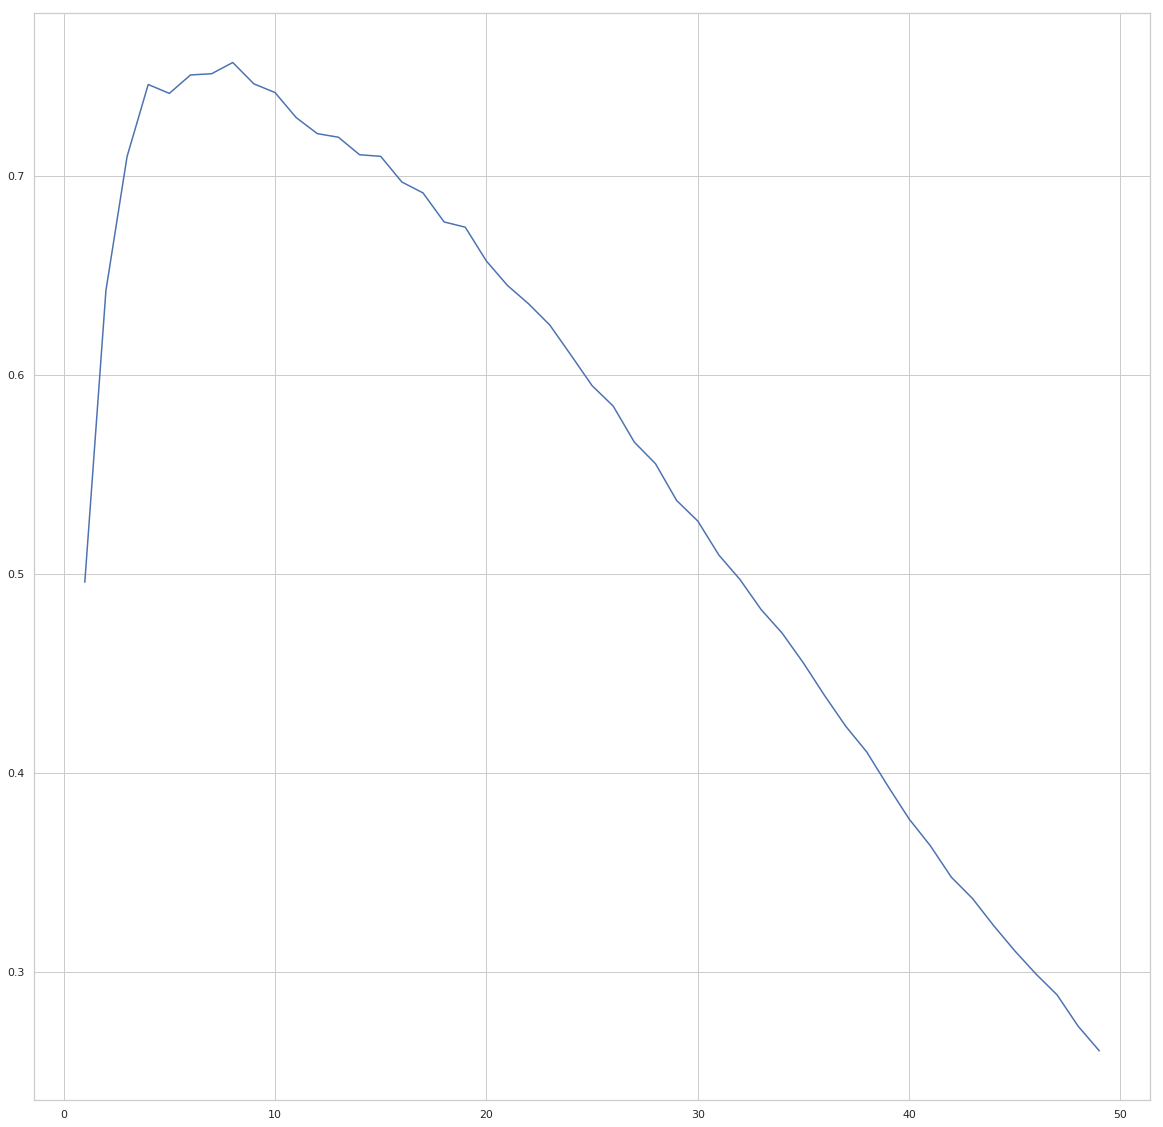

In [129]:
plt.plot(range(1,50),accuracy)

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

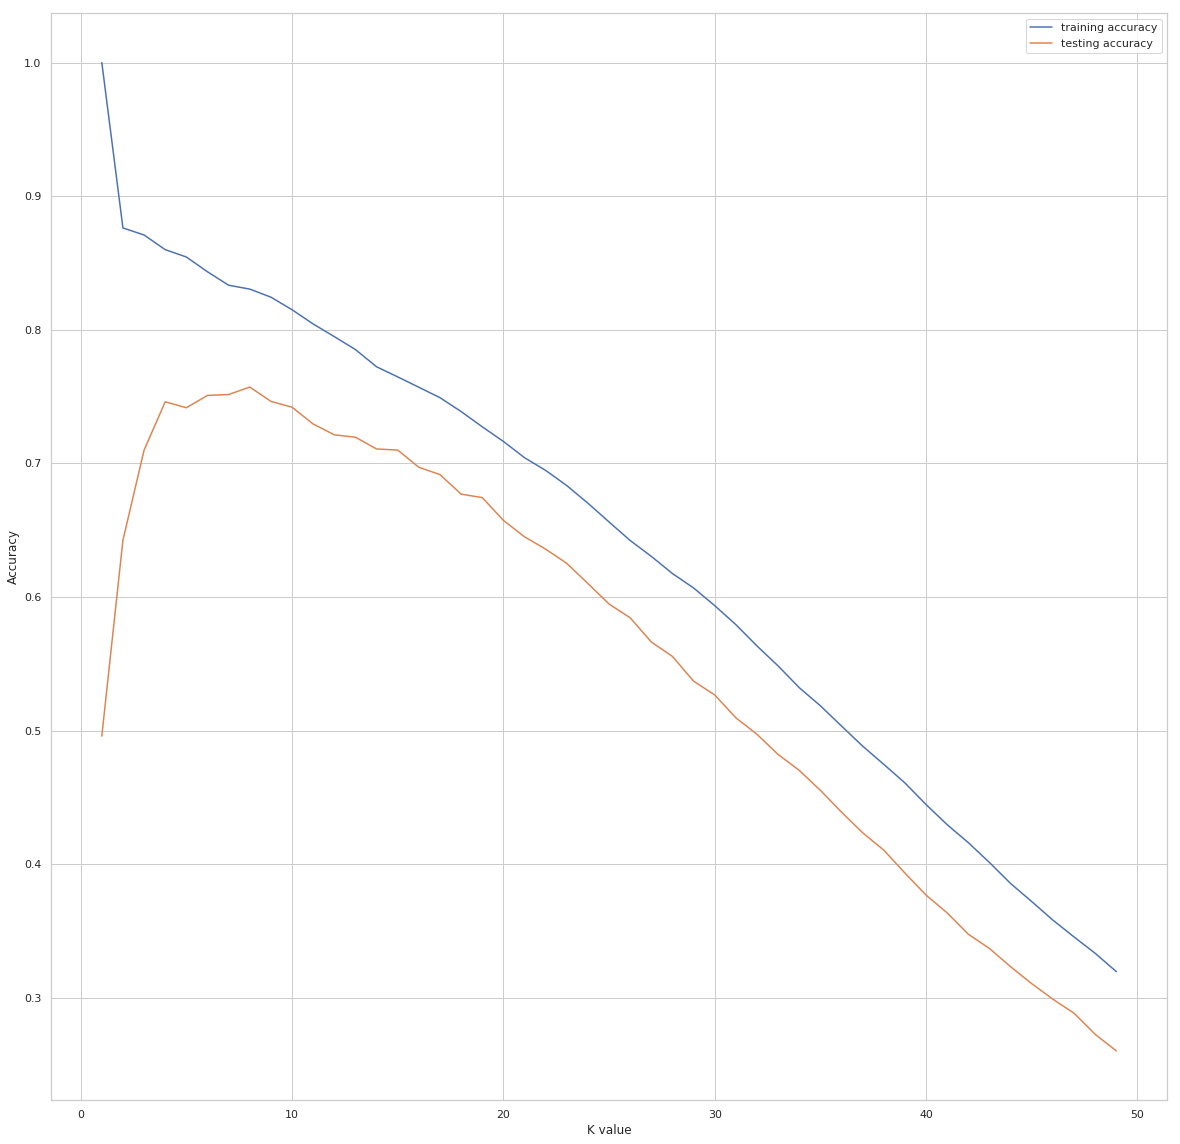

In [130]:
training_accuracy=[]
testing_accuracy=[]

neighbors = list(range(1,50))


for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train,y_train)
    training_accuracy.append(knn.score(x_train,y_train))
    testing_accuracy.append(knn.score(x_test,y_test))    

plt.plot(neighbors,training_accuracy,label='training accuracy')
plt.plot(neighbors,testing_accuracy,label='testing accuracy')
plt.ylabel("Accuracy")
plt.xlabel("K value")
plt.legend()



## CROSS VAL SCORE

In [131]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsRegressor(n_neighbors=5)

scores = cross_val_score(knn,X,y,cv=10)

print (scores)
print (scores.mean())

print ("Mean Accuracy "+str(scores.mean()))




[0.58973297 0.68152226 0.68724125 0.62822786 0.73654044 0.61255793
 0.78564328 0.74049133 0.61693347 0.56077792]
0.6639668714651713
Mean Accuracy 0.6639668714651713


/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

# now we find cross val score for different K value

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

[0.5879423739136473, 0.6426457299639796, 0.6969049115865966, 0.6546924755640509, 0.6639668714651713, 0.6465165338805714, 0.6345372527502361, 0.6165333295055898, 0.5835423880187128, 0.5528791123419067, 0.5367249160178775, 0.5212473478128953, 0.4898956419904855, 0.47046053227706813, 0.45346840294853036, 0.43679415850691256, 0.4171623189475864, 0.39410964747115546, 0.37096384396055715, 0.3466124810304821, 0.32971441612638197, 0.3131061817227589, 0.2981316760150906, 0.27900328389807344, 0.2611696882665143, 0.23891697249065197, 0.22524483959080926, 0.2132957979837226, 0.19899493852160738, 0.18070168936961736, 0.16717276537318174, 0.15725313584763823, 0.14616027395129472, 0.13370087064789934, 0.12609975671734258, 0.1118575089582721, 0.10445945228138276, 0.0960218459383159, 0.08865830318044329, 0.08213969460497832, 0.07786919625979158, 0.07021045937290868, 0.0700195040899104, 0.06618602122389658, 0.06018408023010805, 0.056916081838127394, 0.049517362476870254, 0.04159865178795534, 0.036353967

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

Text(0, 0.5, 'scores')

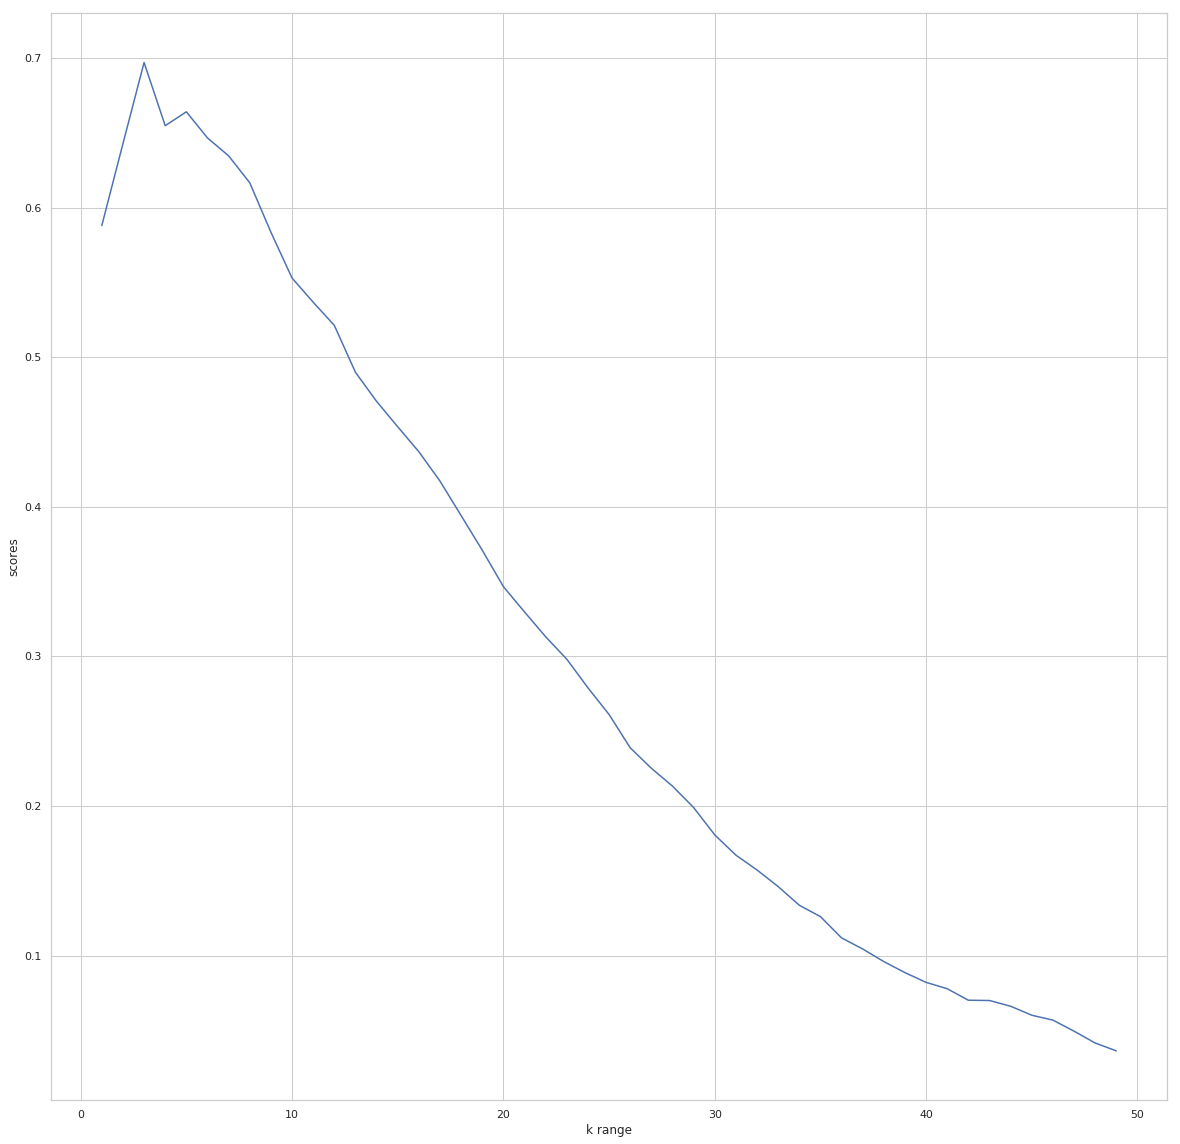

In [132]:



k_range = range(1,50)
k_scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn,X,y,cv=10)
    k_scores.append(scores.mean())
    
print (k_scores)


plt.plot(k_range,k_scores)
plt.xlabel("k range")
plt.ylabel("scores")

## Decision Tree Regresson

In [133]:
from sklearn.tree import DecisionTreeRegressor

In [134]:
tree_clf = DecisionTreeRegressor(max_depth=2,random_state=42)

In [135]:
tree_clf.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [136]:
tree_clf.score(X,y)

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.7112452738994156

## For different Depth

In [137]:
accuracy=[]
for depth in range(1,50):
    dt = DecisionTreeRegressor(max_depth=depth,random_state=42)
    dt.fit(x_train,y_train)
    accuracy.append(dt.score(x_test,y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

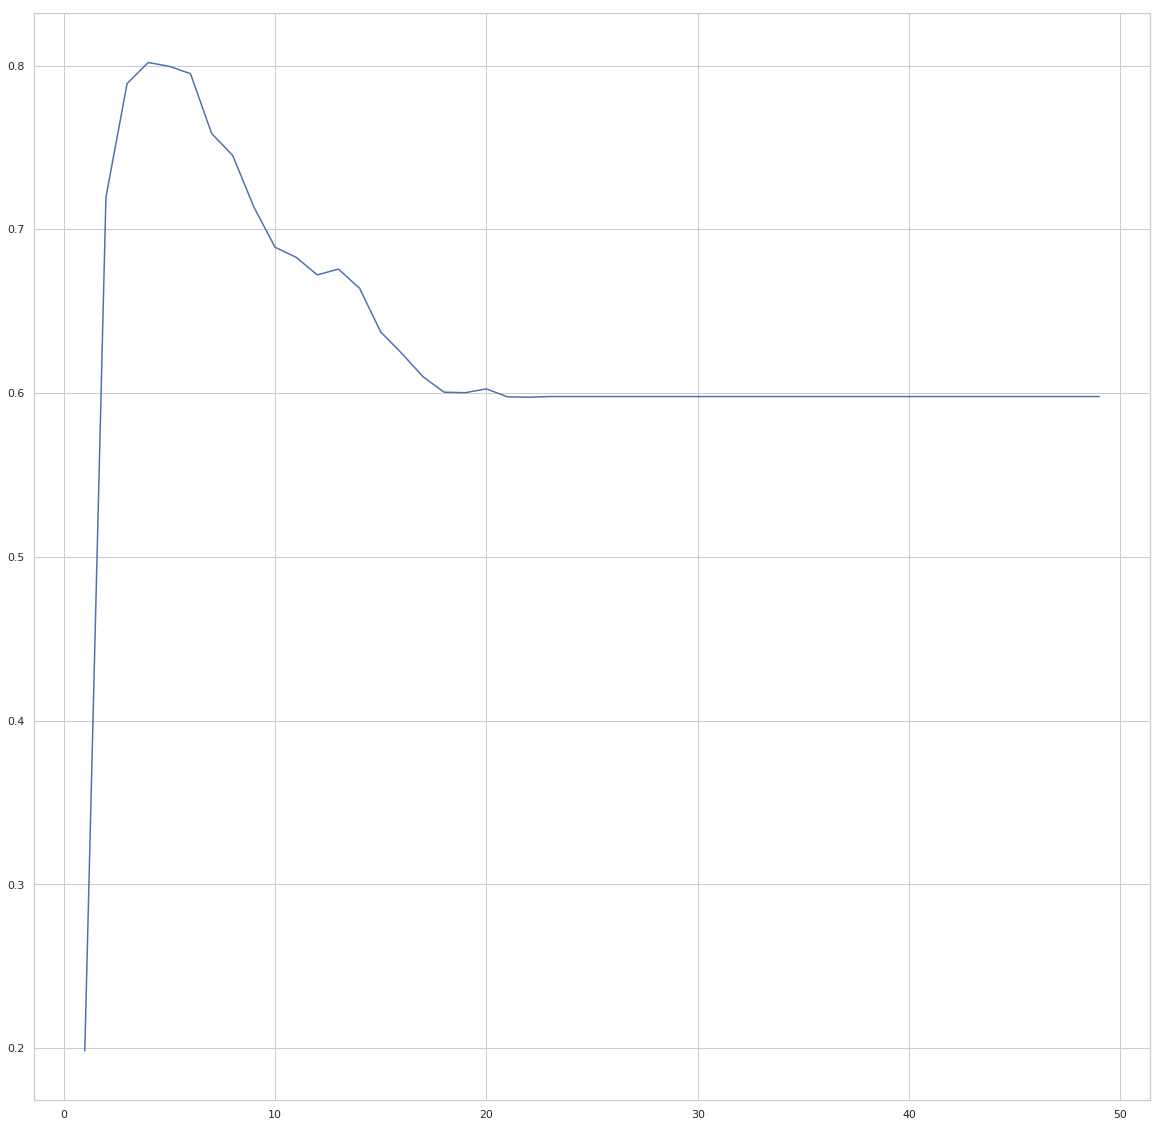

In [138]:
plt.plot(range(1,50),accuracy)

## RANDOM FOREST

In [139]:
from sklearn.ensemble import RandomForestRegressor

In [140]:
rnd = RandomForestRegressor(max_depth=10)

In [141]:
rnd.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [142]:
rnd.score(x_test,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.7679611675189789

In [143]:
accuracy=[]
for depth in range(1,50):
    dt = RandomForestRegressor(max_depth=depth,random_state=42)
    dt.fit(x_train,y_train)
    accuracy.append(dt.score(x_test,y_test))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To 

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To 

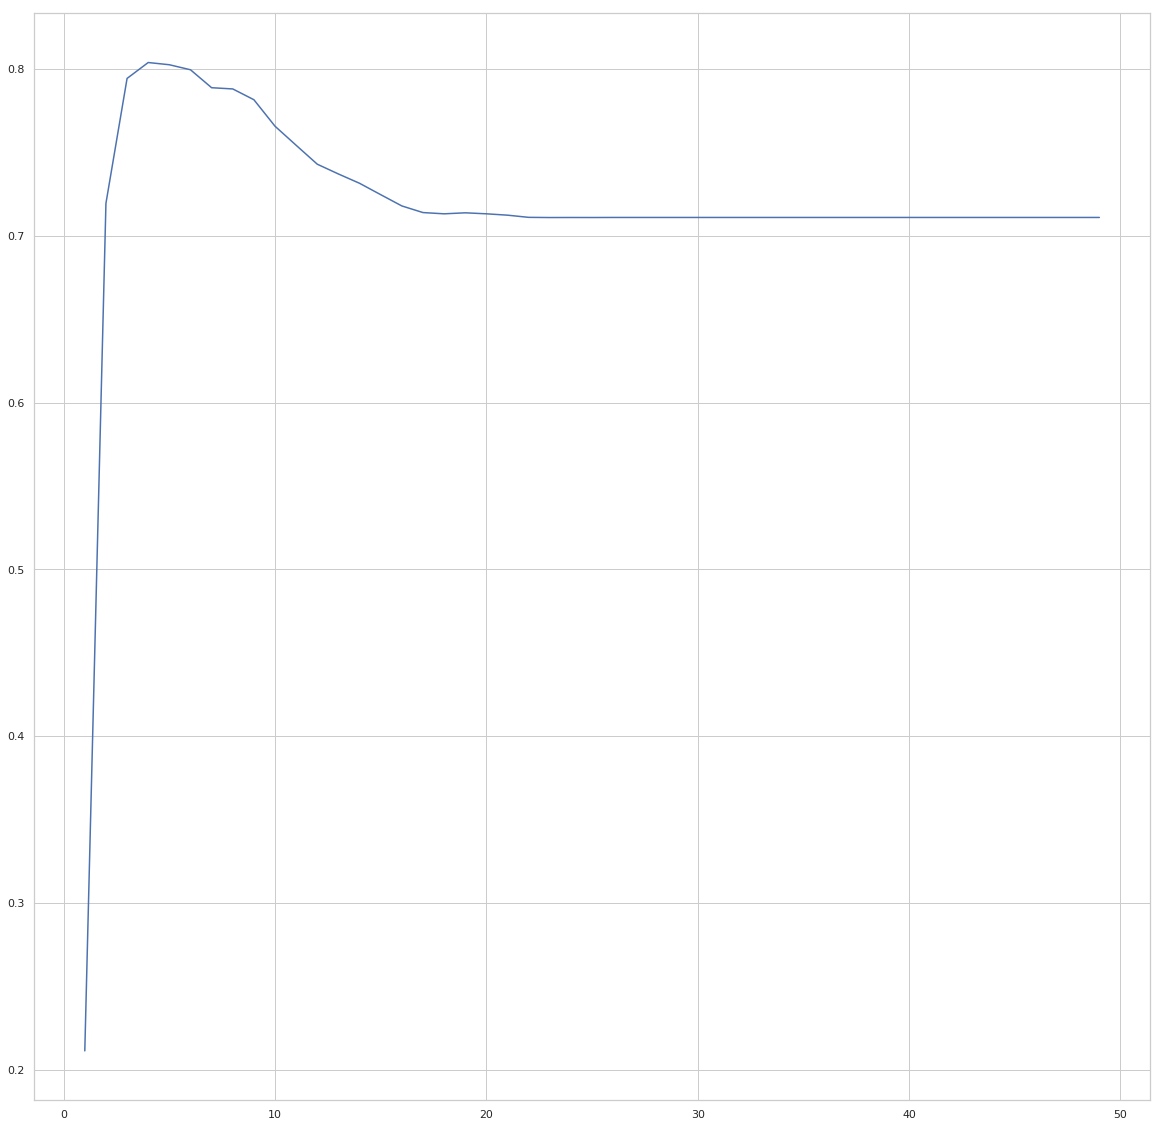

In [144]:
plt.plot(range(1,50),accuracy)

## Combining all the algorithm

![](http://rasbt.github.io/mlxtend/user_guide/regressor/StackingRegressor_files/stackingregression_overview.png)

In [145]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

from mlxtend.regressor import StackingRegressor
dtc=DecisionTreeRegressor()
knnc=KNeighborsRegressor()
gbc=GradientBoostingRegressor()
rfc=RandomForestRegressor()



In [153]:
stregr = StackingRegressor(regressors=[dtc,knnc,gbc,rfc], 
                           meta_regressor=knnc)

In [157]:
y_train

,rain,tem
1041,119.26900,27.3458
1134,585.23300,27.9840
1271,2.98989,20.7727
800,363.87000,27.4322
514,6.26408,23.7047
685,31.31060,20.7237
1322,23.15040,25.5009
227,1.20948,18.9201
192,0.37143,17.4937
983,3.49806,18.8501


In [158]:
stregr.fit(x_train, y_train['tem'])

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


StackingRegressor(meta_regressor=KNeighborsRegressor(algorithm='auto',
                                                     leaf_size=30,
                                                     metric='minkowski',
                                                     metric_params=None,
                                                     n_jobs=None, n_neighbors=5,
                                                     p=2, weights='uniform'),
                  refit=True,
                  regressors=[DecisionTreeRegressor(criterion='mse',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf...
                  

In [160]:
prediction = stregr.predict(x_test)

In [161]:
stregr.score(x_test,y_test['tem'])

0.9556178831507559

In [ ]:
stregr.fit(x_train, y_train['rain'])
prediction = stregr.predict(x_test)
stregr.score(x_test,y_test['rain'])